# CSX46 Homework 3 - Maximum Flow


In this homework assignment, you will use `igraph` to analyze a small directed graph in terms of its maximum-flow properties. You will find the vertex pair in the graph with the largest network flow between them.

You will need to install cairo and igraph, and to import  cairo, igraph, and numpy.

In [1]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
!pip install python-igraph
import cairo
import numpy as np
import igraph
import pandas as pd


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgif-dev is already the newest version (5.1.9-1).
libgif-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev
  libselinux1-dev libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
0 upgraded, 13 newly installed, 0 to remove and 23 not upgraded.
Need to get 

Here is the code to display the PNG image `hw3-graph.png` (the same graph image that is shown in the Canvas page for Homework 3).

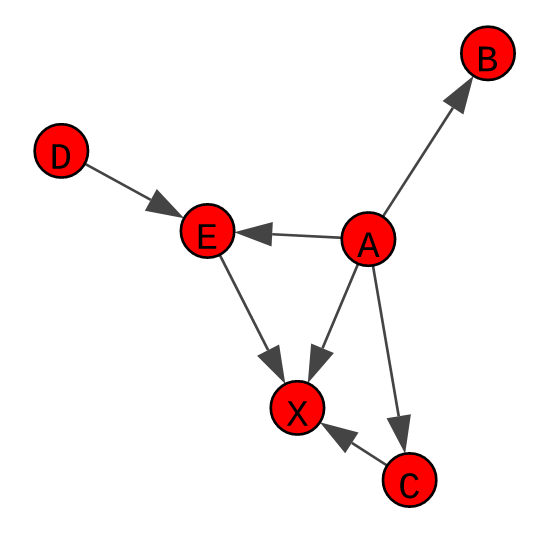

In [2]:
!wget -q https://csx46.s3-us-west-2.amazonaws.com/hw3-graph.png
from IPython.display import Image
Image('hw3-graph.png', width=250)

## Part 1

Define an adjacency matrix for a simple directed graph with six vertices, as shown above:


In [3]:
#connections
#1 A   B,C,E,X
#2 B
#3 C   X
#4 D   E
#5 E   X
#6 X   

# Define the edge list
edge_list = [(0,1), (0,2), (0,4), (0,5),
                                (2,5),
                                (3,4),
                                (4,5)]

# Creates blank adjacency list
adj_matrix = np.zeros((6,6), dtype=int)

# populates adjacency list
for e in edge_list:
    adj_matrix[e[0], e[1]] = 1

print(adj_matrix)

[[0 1 1 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


Make an igraph graph out of this adjacency matrix, and print the graph and its summary:

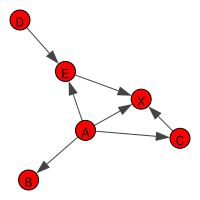

In [4]:
#generates igprah from adj list
g = igraph.Graph.Adjacency((adj_matrix).tolist())
g.vs['label'] =["A", "B", "C", "D", "E", "X"]
label_list = g.vs['label']
#plots adj list
igraph.drawing.plot(g, bbox=[0,0,200,200])

Using the `**igraph**.Graph.maxflow` function, compute the max-flow value between all possible pairs of distinct vertices (note the word *distinct*, meaning that you should *not* compute the max-flow from a vertex to itself). Which pair of vertices have the maximum flow between them? 

##Answer:
**Maximum flow value is: 3.0; for pair of vertices: [('A', 'X')]**

In [5]:
# dict max flow values
max_flow_pair = {}

# Loop over all pairs of vertices
for i in range(len(g.vs)):
    for j in range(len(g.vs)):
        # prevents calculation of maxi flow value between a vertex and itself
        if i != j:
            # Calculate the max flow 
            flow = g.maxflow_value(i, j)
            # Saves max flow value to dict.
            max_flow_pair[(label_list[i], label_list[j])] = flow

# calculates the max flow for the network
max_flow = max(max_flow_pair.values())
# Filter the dict. vertices pair with max. flow
max_flow_pair = [pair for pair, flow in max_flow_pair.items() if flow == max_flow]

# Prints results
print(f"Maximum flow value is: {max_flow}; for pair of vertices: {max_flow_pair}")


Maximum flow value is: 3.0; for pair of vertices: [('A', 'X')]


For this problem, is it necessary to check the max-flow of the vertex pair (j,i) if you have already checked the vertex pair (i,j)?  Why or why not?
##Answer:
**Yes, Due to the graph being directed, there isn't symmetry in the matrix so the vertex-vertex max flow for j-i might be different than that of i-j.**

CS546 students: Can you think of how to do it without any `for` loops?  (list comprehension allowed!)

In [6]:
# dictionary, max flow values
max_flow_pair_c = {}

# Calculate the max flow and saves into dictionary
max_flow_pair = {(label_list[i], label_list[j]): g.maxflow_value(i, j) for i in range(len(g.vs)) for j in range(len(g.vs)) if i != j}

# Find the largest maxflow value and the vertices pair
max_flow_c = max(max_flow_pair.values())
max_flow_pair_c = [pair for pair, flow in max_flow_pair.items() if flow == max_flow]

# Print the results
print(f"Maximum flow value is: {max_flow_c}; for pair of vertices: {max_flow_pair_c}")

Maximum flow value is: 3.0; for pair of vertices: [('A', 'X')]


## Part 2

Retrieve the file `hsmetnet.txt` from the class S3 bucket

In [7]:
#downloads datafile
hmd_df_url = "https://csx46.s3-us-west-2.amazonaws.com/hsmetnet.txt"

Read `hsmetnet.txt` into a `pandas.DataFrame` and then use that data frame to create an `igraph.Graph` directed graph

In [8]:
import urllib
import csv

# Open the URL specified by `hmd_df_url` and assign the file object to `hmd_df`
with urllib.request.urlopen(hmd_df_url) as hmd_df:
    # Read the file object as a CSV file using pandas. The separator is specified as "\t" 
    # (tab-separated values) and quoting is set to csv.QUOTE_NONE, meaning that quotes in the file 
    # will be ignored. The names of the columns in the CSV file are specified as "source" and "target".
    # The `.drop_duplicates()` method is applied to remove any duplicate rows in the DataFrame.
    df = pd.read_csv(hmd_df, 
                         sep="\t",
                         quoting=csv.QUOTE_NONE,
                         names=["source","target"]).drop_duplicates()

# Show the first 6 rows of the DataFrame using the `.head(n=6)` method.
df.head(n=6)



,source,target
0,alkylated DNA,REACTION1
1,REACTION1,DNAn
2,REACTION1,alkylated nucleobase
3,acetyl-CoA,REACTION2
4,1-alkyl-2-lyso-sn-glycero-3-phosphocholine,REACTION2
5,REACTION2,1-alkyl-2-acetyl-sn-glycero-3-phosphocholine


In [9]:
# Extract the values in the "source" and "target" columns of the DataFrame `df`
# and convert it to a list of lists, where each inner list represents a row.
df_st_el = df[["source", "target"]].values.tolist()

# Create a directed bipartite graph using the `igraph.Graph.TupleList` method,
# passing `df_st_el` as the list of edges and specifying `directed=True`.
bipartite_graph = igraph.Graph.TupleList(df_st_el, directed=True)

# Use the `igraph.summary` method to generate a summary of the graph object, 
# including information such as number of vertices and edges, density, and diameter.
igraph.summary(bipartite_graph)

IGRAPH DN-- 7879 19537 -- 
+ attr: name (v)


Get the list of vertex names

In [10]:
#creates vertex_names list of vertex names
vertex_names = bipartite_graph.vs["name"]
vertex_names[0:9]

['alkylated DNA',
 'REACTION1',
 'DNAn',
 'alkylated nucleobase',
 'acetyl-CoA',
 'REACTION2',
 '1-alkyl-2-lyso-sn-glycero-3-phosphocholine',
 '1-alkyl-2-acetyl-sn-glycero-3-phosphocholine',
 'coenzyme A']

Use `List.index` twice, in order to get the positions of `alpha-D-glucose` and `pyruvate` in the `vertex_names` list; use these index positions as the source and target arguments to `igraph.Graph.maxflow_value`

In [11]:
#Use List.index twice, for alpha-D-glucose and pyruvate in the vertex_names list;
adg_i = vertex_names.index("alpha-D-glucose")
pyr_i = vertex_names.index("pyruvate")

#Use these index positions as the source and target arguments to igraph.Graph.maxflow_value
bipartite_graph.maxflow_value(source=adg_i,target=pyr_i)

5.0

Why do you think that this pair of vertices has such a high maximum flow?  (hint: search on "glycolysis").

##Answer:
**This maximum flow between alpha-D-glucose suggests a high degree of connectivity, which makes sense given these compounds represent the input and output of glycolysis. Glycolysis is a fundemental metabolic pathway that provides fuel (ATP) to many cells. Given the prevelence of this pathway in cells, the inputs and outputs of glycolsis having a high max flow is logical.**